## C.2 Simulation schemes

`sec:c1` Writing explicitly the formulas, we have

$$
\begin{aligned}
\overline{X}^{0.5}(x, t, w) &= x + a(x)t + \sigma(x)w, & \text{(A0)} \\
\overline{X}^{1.0}(x, t, w) &= x + a(x)t + \sigma(x)w + \frac{1}{2}\sigma'(x)\sigma(x)(w^2 - t), & \text{(A1)} \\
\overline{X}^{1.5}(x, t, w) &= x + a(x)t + \sigma(x)w + \frac{1}{2}\sigma'(x)\sigma(x)(w^2 - t) & \text{(A2)} \\
&\quad + \left(\frac{1}{2}a'(x)\sigma(x) + \frac{1}{2}\sigma'(x)a(x) + \frac{1}{4}\sigma''(x)\sigma(x)^2\right) tw \\
&\quad + \frac{1}{6} \left(\sigma''(x)\sigma(x)^2 + (\sigma'(x))^2\sigma(x)\right) (w^3 - 3tw).
\end{aligned}
$$
These are equal to the corresponding Ito-Taylor schemes. 
Errors will be measured using

$$
\mathbb{E} \left[ \max_{i=1,...,n} \|X_{t_{i,n}} - \bar{X}^\theta_{t_{i,n}}\|^2 \right] \tag{M}
$$

Here, $t_{i,n} = ih_n, i = 1, ..., n, \theta = 0.5, 1.0, 1.5$ similar measures will be also computed for the strong Ito-Taylor schemes such as the Milshtein scheme.

## M1 Model

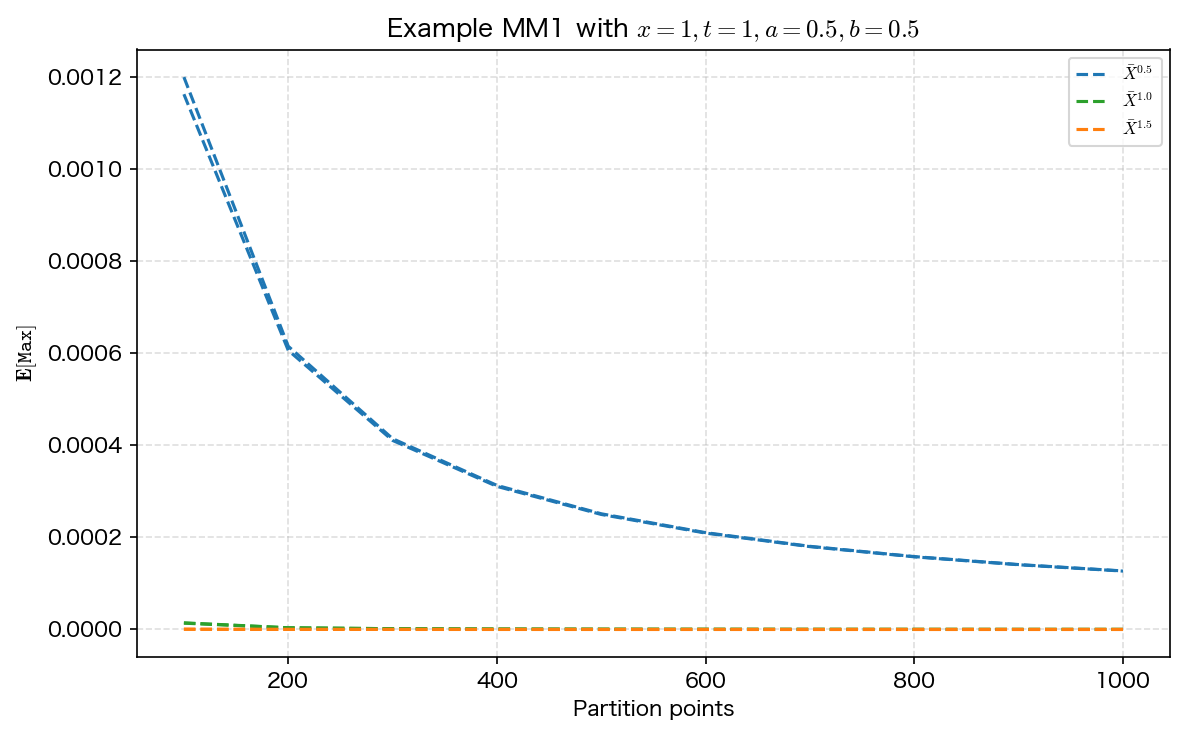

image saved to: sim_pics/MM1.png


In [5]:
#MM1 plot
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
plt.rcParams['axes.unicode_minus'] = False     # 解决负号乱码
plt.rcParams['mathtext.fontset'] = 'cm' 
plt.rcParams['text.usetex'] = False
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "MM1.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/MM1_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")


plt.title(r'Example MM1 with $x=1,t=1,a=0.5,b=0.5$')
plt.xlabel("Partition points")
plt.ylabel(r"$\mathbf{E}[\mathtt{Max}]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=8, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

## M2 Model

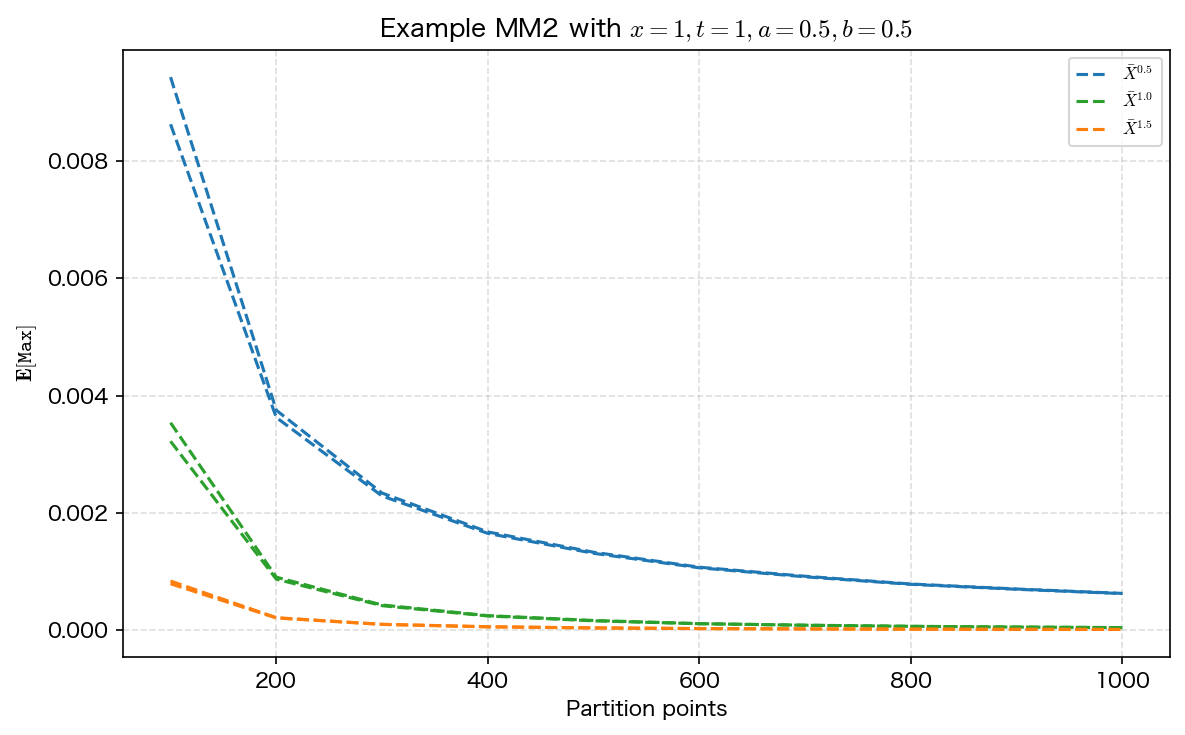

image saved to: sim_pics/MM2.png


In [6]:
#MM2 plot
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
plt.rcParams['axes.unicode_minus'] = False     # 解决负号乱码
plt.rcParams['mathtext.fontset'] = 'cm' 
plt.rcParams['text.usetex'] = False
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "MM2.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/MM2_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")


plt.title(r'Example MM2 with $x=1,t=1,a=0.5,b=0.5$')
plt.xlabel("Partition points")
plt.ylabel(r"$\mathbf{E}[\mathtt{Max}]$")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=8, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)